#### Import Required Modules

In [1]:
import numpy as np
import tensorflow as tf

from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

from tensorflow.keras import layers, losses, Model, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt
from model import *

## Loading & Preprocessing Data
#### Feature Extraction - Load data from facebook dataset

In [2]:
# load data
X_features, labels, edges = load_data()

# check loaded properly
num_classes = len(np.unique(labels))
num_nodes = X_features.shape[0]
num_features = X_features.shape[1]
num_edges = len(edges)/2

print("num of classes: " + str(num_classes))
print("num of nodes: " + str(num_nodes))
print("num of features: " + str(num_features))
print("num of edges: "+ str(num_edges))

# adjacency matrix
A = get_adj_matrix(labels, edges)

num of classes: 4
num of nodes: 22470
num of features: 128
num of edges: 171002.0


#### Normalise Adjacency Matrix

In [3]:
# normalise
A = normalise_adj(A)

#### Split Training, Validation, and Testing

In [4]:
# Get indices for splitting set
train_idx, val_idx, test_idx = split_index(labels)

# Apply mask
train_mask = np.zeros((num_nodes,), dtype = bool)
val_mask = np.zeros((num_nodes,), dtype = bool)
test_mask = np.zeros((num_nodes,), dtype = bool)

train_mask[train_idx] = True
val_mask[val_idx] = True
test_mask[test_idx] = True

In [5]:
# One-hot encoding
encoded_labels, classes, encoder = encode(labels)

## Building & Training GCN

In [6]:
# Parameters
channels = 16 #num for first layer
dropout = 0.5 #rate
l_rate = 1e-2 #learning rate
l2_reg = 2.5e-4 # regularisation rate
epochs = 200 #number of epochs

In [7]:
# Create and Compile
model = GCN_Model(num_features, num_classes, channels, 
                  dropout, l2(l2_reg), num_nodes)

model.compile(optimizer = Adam(learning_rate = l_rate), 
              loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128)          0           input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 22470)]      0                                            
__________________________________________________________________________________________________
gcn__layer (GCN_Layer)          (None, 16)           2048        dropout[0][0]                    
                                                                 input_2[0][0]                

In [8]:
# Train
validation_data = ([X_features, A], encoded_labels, val_mask)
    
history = model.fit([X_features, A], 
              encoded_labels,
             sample_weight = train_mask,
             epochs = epochs,
             batch_size = num_nodes,
             validation_data = validation_data,
              shuffle = False)
    

Epoch 1/200
1/1 [==============================] - 25s 25s/step - loss: 0.3179 - acc: 0.2441 - val_loss: 0.2713 - val_acc: 0.3212
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 0.2780 - acc: 0.3181 - val_loss: 0.2417 - val_acc: 0.4443
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.2484 - acc: 0.4086 - val_loss: 0.2184 - val_acc: 0.5570
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 0.2265 - acc: 0.5080 - val_loss: 0.1995 - val_acc: 0.6498
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 0.2053 - acc: 0.5899 - val_loss: 0.1838 - val_acc: 0.6930
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.1880 - acc: 0.6528 - val_loss: 0.1703 - val_acc: 0.7286
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.1749 - acc: 0.6863 - val_loss: 0.1587 - val_acc: 0.7594
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 0.1624 - acc: 0.7162 - val_loss:

1/1 [==============================] - 2s 2s/step - loss: 0.0702 - acc: 0.8640 - val_loss: 0.0611 - val_acc: 0.9054
Epoch 65/200
1/1 [==============================] - 2s 2s/step - loss: 0.0698 - acc: 0.8656 - val_loss: 0.0609 - val_acc: 0.9059
Epoch 66/200
1/1 [==============================] - 2s 2s/step - loss: 0.0685 - acc: 0.8714 - val_loss: 0.0607 - val_acc: 0.9062
Epoch 67/200
1/1 [==============================] - 2s 2s/step - loss: 0.0698 - acc: 0.8643 - val_loss: 0.0605 - val_acc: 0.9065
Epoch 68/200
1/1 [==============================] - 2s 2s/step - loss: 0.0696 - acc: 0.8648 - val_loss: 0.0603 - val_acc: 0.9069
Epoch 69/200
1/1 [==============================] - 2s 2s/step - loss: 0.0702 - acc: 0.8643 - val_loss: 0.0602 - val_acc: 0.9070
Epoch 70/200
1/1 [==============================] - 2s 2s/step - loss: 0.0706 - acc: 0.8663 - val_loss: 0.0601 - val_acc: 0.9070
Epoch 71/200
1/1 [==============================] - 2s 2s/step - loss: 0.0709 - acc: 0.8654 - val_loss: 0.0599

1/1 [==============================] - 2s 2s/step - loss: 0.0623 - acc: 0.8738 - val_loss: 0.0561 - val_acc: 0.9134
Epoch 128/200
1/1 [==============================] - 2s 2s/step - loss: 0.0629 - acc: 0.8746 - val_loss: 0.0560 - val_acc: 0.9134
Epoch 129/200
1/1 [==============================] - 2s 2s/step - loss: 0.0634 - acc: 0.8751 - val_loss: 0.0559 - val_acc: 0.9137
Epoch 130/200
1/1 [==============================] - 2s 2s/step - loss: 0.0639 - acc: 0.8764 - val_loss: 0.0559 - val_acc: 0.9140
Epoch 131/200
1/1 [==============================] - 2s 2s/step - loss: 0.0650 - acc: 0.8725 - val_loss: 0.0558 - val_acc: 0.9138
Epoch 132/200
1/1 [==============================] - 2s 2s/step - loss: 0.0635 - acc: 0.8730 - val_loss: 0.0558 - val_acc: 0.9136
Epoch 133/200
1/1 [==============================] - 2s 2s/step - loss: 0.0617 - acc: 0.8751 - val_loss: 0.0558 - val_acc: 0.9139
Epoch 134/200
1/1 [==============================] - 2s 2s/step - loss: 0.0636 - acc: 0.8752 - val_loss:

1/1 [==============================] - 1s 1s/step - loss: 0.0606 - acc: 0.8793 - val_loss: 0.0550 - val_acc: 0.9173
Epoch 191/200
1/1 [==============================] - 2s 2s/step - loss: 0.0620 - acc: 0.8805 - val_loss: 0.0550 - val_acc: 0.9170
Epoch 192/200
1/1 [==============================] - 2s 2s/step - loss: 0.0629 - acc: 0.8764 - val_loss: 0.0549 - val_acc: 0.9172
Epoch 193/200
1/1 [==============================] - 2s 2s/step - loss: 0.0629 - acc: 0.8788 - val_loss: 0.0548 - val_acc: 0.9172
Epoch 194/200
1/1 [==============================] - 2s 2s/step - loss: 0.0617 - acc: 0.8761 - val_loss: 0.0547 - val_acc: 0.9175
Epoch 195/200
1/1 [==============================] - 2s 2s/step - loss: 0.0644 - acc: 0.8788 - val_loss: 0.0547 - val_acc: 0.9178
Epoch 196/200
1/1 [==============================] - 1s 1s/step - loss: 0.0635 - acc: 0.8768 - val_loss: 0.0546 - val_acc: 0.9179
Epoch 197/200
1/1 [==============================] - 2s 2s/step - loss: 0.0612 - acc: 0.8798 - val_loss:

## Results

Plot Accuracy and Loss Comparison

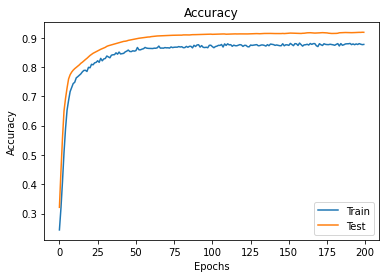

In [9]:
plt.plot(history.history.get('acc'))
plt.plot(history.history.get('val_acc'))

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])

plt.savefig("model accuracy.jpeg")
plt.show()

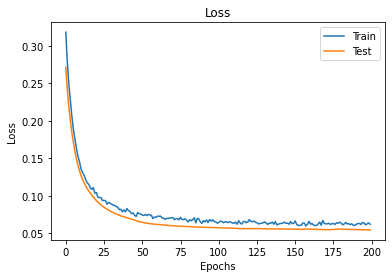

In [10]:
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))

plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])

plt.savefig("model loss.jpeg")
plt.show()

In [12]:
y_predictions = model.predict([X_features, A], batch_size = num_nodes)

y_true = np.argmax(encoded_labels[test_mask], axis = 1)
y_pred = np.argmax(y_predictions[test_mask], axis = 1)

report = classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2009
           1       0.93      0.90      0.91      3919
           2       0.90      0.94      0.92      4129
           3       0.93      0.94      0.93      3425

    accuracy                           0.91     13482
   macro avg       0.91      0.91      0.91     13482
weighted avg       0.91      0.91      0.91     13482



## TSNE Plot

Each point is a node representing the facebook page. The colours represent the four possible categories.

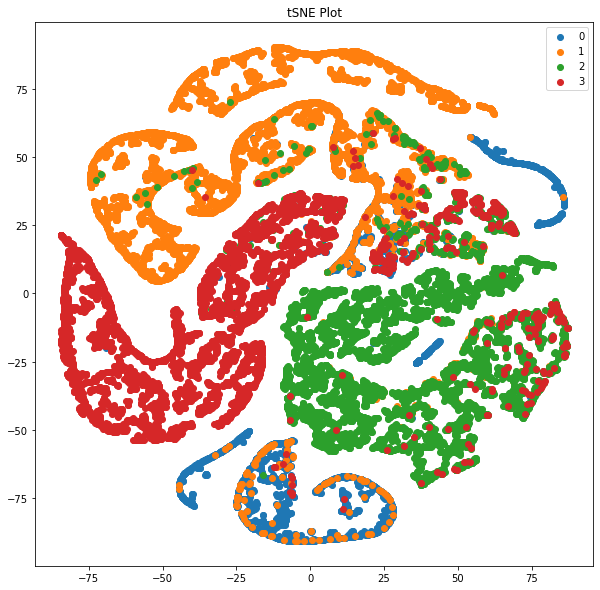

In [13]:
output = y_predictions

tsne = TSNE(n_components = 2).fit_transform(output)
plt.figure(figsize = (10,10))

colour_map = np.argmax(encoded_labels, axis = 1)
for class_ in range(num_classes):
    indices = np.where(colour_map == class_)
    plt.scatter(tsne[indices[0], 0], tsne[indices[0],1], label = class_)
    
plt.title('tSNE Plot')
plt.legend()

plt.savefig("tsne_plot.jpeg")
plt.show()